In [265]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [266]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.50
    if effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**i)))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*i))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(contlist, sum(contlist))
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, title = f"Effort decisions by period for deadline = {deadline}",).legend(bbox_to_anchor=(1.0, 1.0)) ##colormap = 'hot')
        #plot



    return cltemp     

In [267]:
# Assign Variables

delta = 0.95        # Discount Factor
beta = 0.9          # Temporal Bias
w = 8         # Required accumulated Effort
r = 1.01           # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.95; beta = 0.9; w = 8;


[0.8076093566065727, 0.8593576299133199, 0.8730702609967712, 0.885445910549586, 0.8966149342710014, 0.9066949781795788, 0.9157922178070699, 0.9240024765708805, 0.9314122351052196] 8.0
[0.8076093566065727, 0.8331818309102007, 0.8899417025168693, 0.9006723865214746, 0.9103568288356308, 0.9190970380241569, 0.9269850768168015, 0.9341040318271634, 0.940528888724015] 8.062477140782885
[0.8076093566065727, 0.8331818309102007, 0.8558801629613886, 0.9141875279769234, 0.9225542439991734, 0.930105205209254, 0.9369199477013517, 0.94307025280047, 0.9486209031524241] 8.09212943131776
[0.8076093566065727, 0.8331818309102007, 0.8558801629613886, 0.8760969111913804, 0.9334181291014763, 0.9399098615140824, 0.9457686500164594, 0.9510562066398546, 0.9558282264924687] 8.098749335433885
[0.8076093566065727, 0.8331818309102007, 0.8558801629613886, 0.8760969111913804, 0.8942072224777814, 0.9486929445161842, 0.9536953824258563, 0.9582100826393354, 0.9622845995820002] 8.0898584933107
[0.8076093566065727, 0.8331

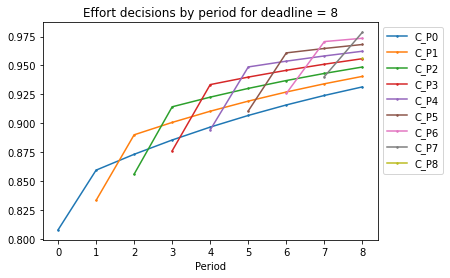

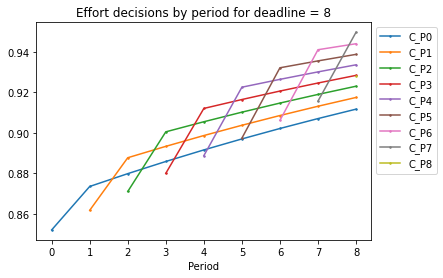

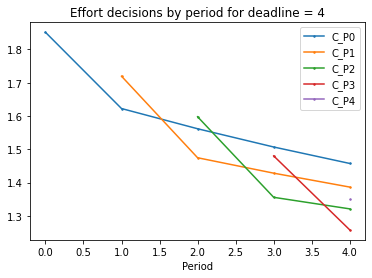

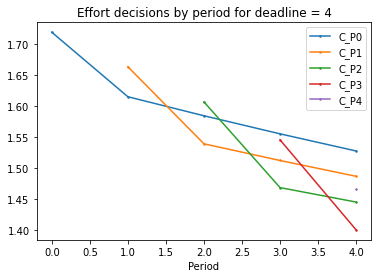

In [268]:
# Interesting Plots:
plottest1 = contributioncalc(8, True, "sqrt", True)
plottest2 = contributioncalc(8, True, "log", False)
plottest3 = contributioncalc(4, True, "sqrt", False)
plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt
0          8  2.000000    0.693147     1.414214    0.640110     1.306002
1          9  3.000000    1.098612     1.732051    1.004505     1.583683
2         10  4.000000    1.386294     2.000000    1.254994     1.810574
3         11  5.000000    1.609438     2.236068    1.442577     2.004241
4         12  5.811863    1.759901     2.410781    1.561823     2.139445
5         13  6.304123    1.841204     2.510801    1.617797     2.206147
6         14  6.603964    1.887670     2.569818    1.642203     2.235646
7         15  6.798379    1.916684     2.607370    1.650935     2.245857
8         16  6.906260    1.932428     2.627976    1.648016     2.241194
9         17  6.963203    1.940640     2.638788    1.638632     2.228133
10        18  6.979426    1.942967     2.641860    1.624354     2.208641
11        19  6.962963    1.940605     2.638743    1.606316     2.184193
12        20  6.920200    1.934445     2.630627    

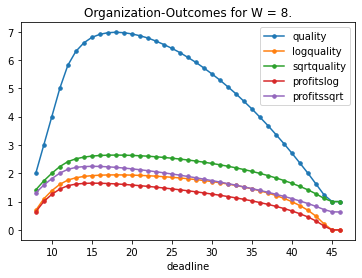

In [269]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 4*t + 15

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "log", False)]
    if sum(quallist) > 0:
        qualsum = sum(quallist) + 1
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt} Periods.")